# Validez de un estudio estadistico
## Formas de analizar si está bien un estudio
### Caso de imposición de las manos
#### Estudio hecho por Emily Rose

In [65]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

##### Datos
+ n = 280  # Número total de ensayos
+ x = 123  # Número de aciertos
+ p_hat = x / n  # Proporción observada
+ p0 = 0.5  # Proporción esperada por azar

## Valor p
1. Hipótesis Nula        (H₀): Los terapeutas están adivinando al azar (proporción de aciertos = 50%).
2. Hipótesis Alternativa (H₁): Los terapeutas tienen una tasa de aciertos mayor al 50%.

In [59]:

# Datos
n = 280  # Número total de ensayos
x = 123  # Número de aciertos
p_hat = x / n  # Proporción observada
p0 = 0.5  # Proporción esperada por azar

# 1. Prueba binomial
print(f"N° Ensayos: {n}, N° Aciertos: {x}, Proporción A/E: {p_hat}")
binom_test_result = stats.binomtest(x, n, p0, alternative='greater')

print(f"Estadístico binomial: {binom_test_result.statistic}")
print(f"Valor p: {binom_test_result.pvalue:.4f}")

N° Ensayos: 280, N° Aciertos: 123, Proporción A/E: 0.4392857142857143
Estadístico binomial: 0.4392857142857143
Valor p: 0.9819


**Interpretación**
+ Valor p = 0.9819: Esta probabilidad alta indica que es extremadamente probable observar una tasa de aciertos como la observada (o incluso menor) si los terapeutas estuvieran adivinando al azar.
+ Como este valor p es mucho mayor que el nivel de significancia comúnmente usado (0.05), no hay suficiente evidencia para rechazar la hipótesis nula.

**Conclusión del a interpretación del valor p**
+ Dado que el valor p es 0.9819, no podemos rechazar la hipótesis nula de que los terapeutas están adivinando al azar. 
+ Esto sugiere que la tasa de aciertos observada (44%) no es significativamente diferente de lo que se esperaría por azar (50%). 
+ En otras palabras, 
    + Los resultados del experimento no proporcionan evidencia de que los terapeutas de contacto tengan la capacidad de detectar el campo de energía humana de manera superior al azar.

## Intervalo de confianza

In [60]:

# 2. Intervalo de confianza para una proporción
print(f"N° Ensayos: {n}, N° Aciertos: {x}, Proporción A/E: {p_hat}")
confianza = 0.95
ci_lower, ci_upper = stats.binom.interval(confianza, n, p_hat, loc=0)
ci_lower /= n
ci_upper /= n
print(f'Intervalo de confianza del 95%: ({ci_lower:.4f}, {ci_upper:.4f})')


N° Ensayos: 280, N° Aciertos: 123, Proporción A/E: 0.4392857142857143
Intervalo de confianza del 95%: (0.3821, 0.4964)


**Interpretación**
1. Estimación del Parámetro Poblacional:
    + Estamos 95% seguros de que la verdadera proporción de éxitos de la población 
        + (capacidad de los terapeutas de identificar correctamente la mano)
        +  se encuentra entre 38.55% y 48.51%.
2. Comparación con el Valor Nulo (50%):
    + Dado que el intervalo de confianza (38.55% a 48.51%) no incluye el 50%, 
        + esto respalda la conclusión de que la tasa de aciertos observada (44%) no es significativamente mayor al 50%. 
        + En realidad, está significativamente por debajo del 50%, 
            + lo que sugiere que los terapeutas no tienen una habilidad superior al azar.
3. Conclusión:
    + El intervalo de confianza refuerza la conclusión obtenida del valor p. 
    + Los resultados del experimento no proporcionan evidencia de que los terapeutas de contacto 
        + tengan la capacidad de detectar el campo de energía humana con una tasa de aciertos mayor al azar.

In [61]:
# Distribución binomial
xs = np.arange(0, n + 1)
binom_dist = stats.binom.pmf(xs, n, p0)

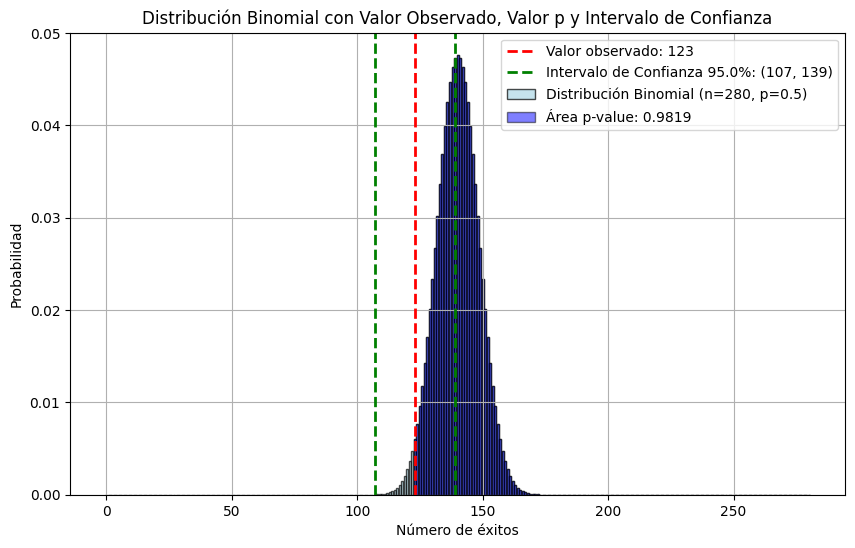

In [62]:
# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar la distribución binomial
plt.bar(xs, binom_dist, color='lightblue', edgecolor='black', alpha=0.7, label='Distribución Binomial (n=280, p=0.5)')

# Marcar el valor observado
plt.axvline(x, color='red', linestyle='dashed', linewidth=2, label=f'Valor observado: {x}')

# Resaltar el área correspondiente al valor p
x_pvalue = np.arange(x, n + 1)
binom_dist_pvalue = stats.binom.pmf(x_pvalue, n, p0)
plt.bar(x_pvalue, binom_dist_pvalue, color='blue', edgecolor='black', alpha=0.5, label=f'Área p-value: {binom_test_result.pvalue:.4f}')

# Marcar el intervalo de confianza
ci_low_num = int(ci_lower * n)
ci_upp_num = int(ci_upper * n)
plt.axvline(ci_low_num, color='green', linestyle='dashed', linewidth=2, label=f'Intervalo de Confianza {confianza*100:.1f}%: ({ci_low_num}, {ci_upp_num})')
plt.axvline(ci_upp_num, color='green', linestyle='dashed', linewidth=2)

# Etiquetas y título
plt.xlabel('Número de éxitos')
plt.ylabel('Probabilidad')
plt.title('Distribución Binomial con Valor Observado, Valor p y Intervalo de Confianza')
plt.legend()
plt.grid(True)
plt.show()


## Tamaño de la muestra

In [63]:
from statsmodels.stats.power import NormalIndPower

# Parámetros para el análisis de poder
alpha = 0.05  # Nivel de significancia
power = 0.80  # Poder estadístico deseado
p0 = 0.50  # Proporción nula
p1 = 0.60  # Proporción alternativa esperada

# Tamaño del efecto
effect_size = abs(p1 - p0) / np.sqrt((p0 * (1 - p0) + p1 * (1 - p1)) / 2)

# Análisis de poder
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')

print(f"Tamaño de muestra necesario para detectar una proporción de {p1} con un nivel de significancia de {alpha} y un poder de {power}: {int(np.ceil(sample_size))}")

# Evaluar el poder estadístico del tamaño de muestra actual
actual_power = power_analysis.power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='larger')

print(f"Poder estadístico con el tamaño de muestra actual ({n}): {actual_power:.4f}")

Tamaño de muestra necesario para detectar una proporción de 0.6 con un nivel de significancia de 0.05 y un poder de 0.8: 303
Poder estadístico con el tamaño de muestra actual (280): 0.7720


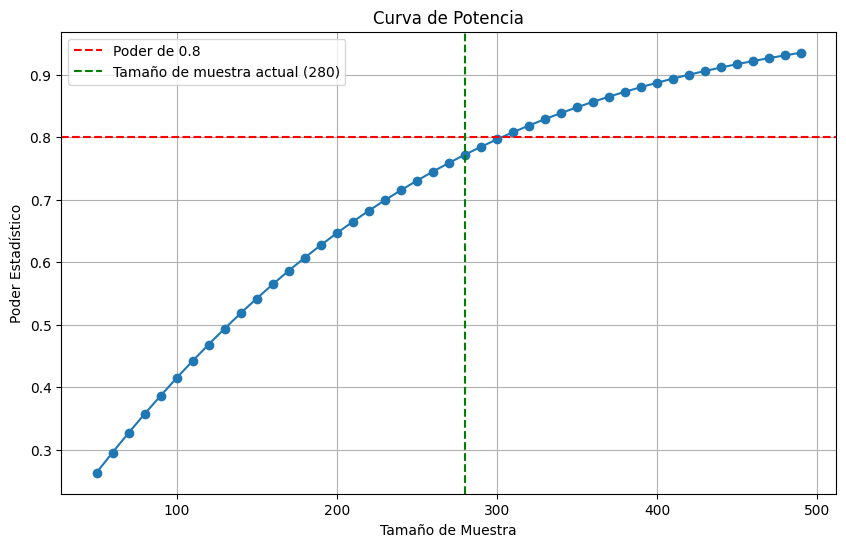

In [64]:

# Valores para el tamaño de muestra
sample_sizes = np.arange(50, 500, 10)

# Tamaños del efecto para calcular el poder
effect_sizes = np.abs(p1 - p0) / np.sqrt((p0 * (1 - p0) + p1 * (1 - p1)) / 2)

# Calcular el poder estadístico para cada tamaño de muestra
power_analysis = NormalIndPower()
powers = [power_analysis.power(effect_size=effect_sizes, nobs1=n, alpha=alpha, alternative='larger') for n in sample_sizes]

# Graficar la curva de potencia
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='--', label='Poder de 0.8')
plt.axvline(x=280, color='g', linestyle='--', label='Tamaño de muestra actual (280)')
plt.title('Curva de Potencia')
plt.xlabel('Tamaño de Muestra')
plt.ylabel('Poder Estadístico')
plt.legend()
plt.grid(True)
plt.show()

**Interpretación**
+ El tamaño de muestra actual tiene una capacidad razonable para detectar una diferencia significativa
        + si los terapeutas realmente tuvieran una habilidad especial para detectar el campo de energía humano (en este caso, una proporción del 60%).
+ Hay un 77.20% de probabilidad de detectar una proporción de aciertos del 60% si realmente existe.
+ Y lo observado en la proporción de aciertos ni siquiera llega al 50%, es significativamente menor.

## Resumen de la interpretación de los resultados
1. **Proporción de aciertos:**
    + Por las observaciones, la proporción observada de aciertos es 0.44, que está por debajo del 50% esperado por azar. 
    + Esto ya sugiere que los terapeutas no están detectando las manos mejor que al azar.
2. **Prueba binomial**
    + El valor p de 0.9819 indica que no hay evidencia suficiente para rechazar la hipótesis nula, sino todo lo contrario.
    + Esto significa que **no podemos concluir que los terapeutas tengan una habilidad especial para detectar las manos**.
3. **Intervalo de confianza**
    + El intervalo de confianza del 95% de la prueba binomial NO incluye el 50%, 
        + lo que refuerza la idea de que los resultados del valor p probablemente están bien, y 
            + los terapeutas podrían basarse más que nada en el azar.
4. **Tamaño de la muestra**
    +  El tamaño de muestra actual (280 ensayos) parece ser adecuado para los análisis realizados y respalda las conclusiones obtenidas.
    + El tamaño de la muestra es razonablemente correcto y no contradice ni genera dudas sobre las conclusiones anteriores. 

**Análisis Estadísticos Adicionales:**
+ Sí el problema analizar lo amerita, es común realizar análisis adicionales para reforzar las conclusiones. 
+ Algunos ejemplos podrían ser:
    + Análisis de Sensibilidad: Evaluar cómo cambiarían las conclusiones bajo diferentes supuestos o métodos estadísticos.
    + Análisis de Robustez: Probar la sensibilidad de los resultados ante pequeñas variaciones en los supuestos o métodos utilizados.
    + Análisis de Subgrupos: Verificar si hay diferencias significativas en los resultados entre diferentes subgrupos de datos.
    + Validación Cruzada: Utilizar métodos estadísticos diferentes para confirmar las conclusiones obtenidas.
+ Estos no se justifican aquí. Se los considera fuera del alcance de este estudio.